In [18]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.csgraph import dijkstra

import networkx as nx

from celluloid import Camera
from tqdm.auto import tqdm


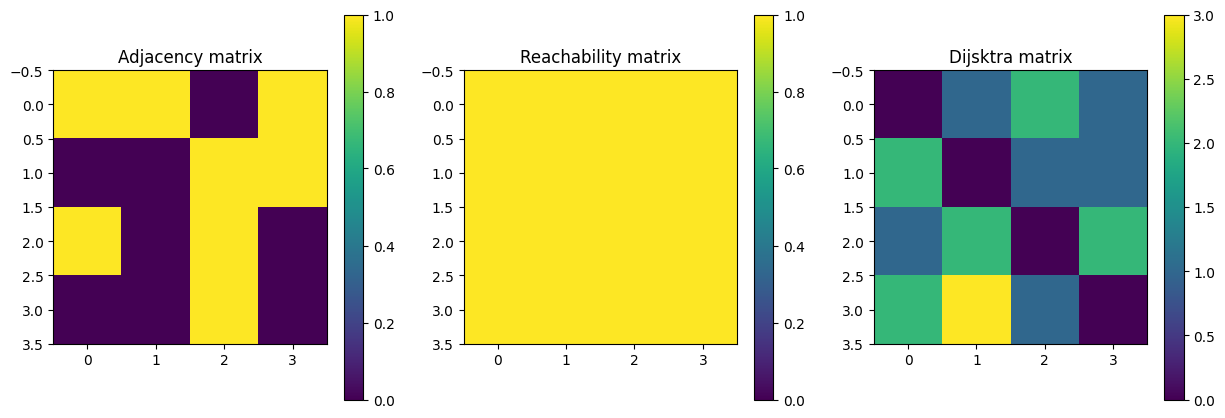

In [47]:
rng = jax.random.PRNGKey(1)

def calc_reachability_matrix(A):
    n, _ = A.shape
    R = jnp.zeros_like(A)
    An = A
    for i in range(n):
        R = jnp.logical_or(R, An)
        An = An@A
    return R

n_states, n_acts = 4, 3
trans_matrix = jax.random.normal(rng, (n_acts, n_states, n_states)) + 0*jnp.eye(n_states, k=1)
trans_matrix = jax.nn.softmax(trans_matrix*1e6, axis=-2)
A = trans_matrix.max(axis=0)
R = calc_reachability_matrix(A)
D = dijkstra(A)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Adjacency matrix')
plt.imshow(A, vmin=0, vmax=1)
plt.colorbar()
plt.subplot(1,3,2)
plt.title('Reachability matrix')
plt.imshow(R, vmin=0, vmax=1)
plt.colorbar()
plt.subplot(1,3,3)
plt.title('Dijsktra matrix')
plt.imshow(D)
plt.colorbar()

plt.show()



  0%|          | 0/1 [00:00<?, ?it/s]

/var/folders/ny/19b3c5357vzbxc3hyg919d9r0000gn/T/ipykernel_69311/2125990308.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(*pos[i], c=[0, 0, 1, .5], marker='o', s=100, zorder=100, label='agent state')


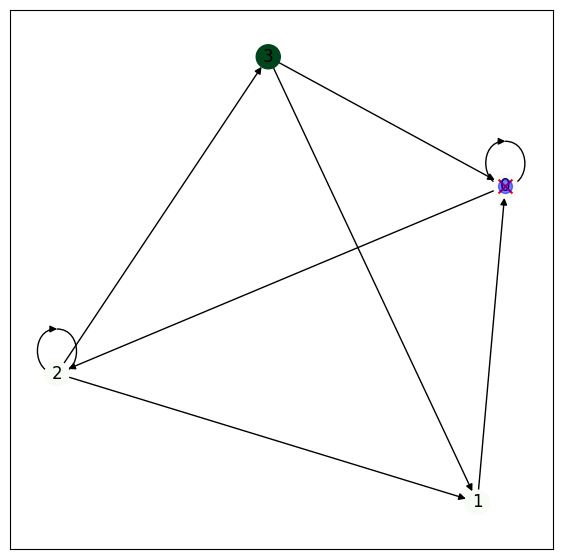

In [46]:
def hehe():
    np.random.seed(0)

    G = nx.DiGraph()
    G.add_nodes_from(list(range(n_states)))
    for act in range(n_acts):
        node_from = jnp.arange(n_states).tolist()
        node_to = jnp.argmax(trans_matrix[act], axis=-2).tolist()
        G.add_edges_from(list(zip(node_from, node_to)))

    # pos = nx.circular_layout(G)
    # pos = nx.shell_layout(G)
    pos = nx.spring_layout(G)

    # c = ['#1f77b4' for _ in range(n_states)]
    # c = [(31/255.,119/255.,180/255.,255/255.) for _ in range(n_states)]
    # c[0] = (0, 0, 1, 1)
    # c[-1] = (1, 0, 0, 1)
    # c = [(0, 1, 0, 1) for _ in range(n_states)]
    # rews = jnp.arange(n_states)
    rews = jnp.zeros(n_states)
    rews = rews.at[-1].set(1.)
    c = (rews-rews.min())/(rews.max()-rews.min() + 1e-5)

    fig = plt.figure(figsize=(7, 7))
    camera = Camera(fig)
    
    for i in tqdm(range(1)):
        nx.draw_networkx(G, with_labels=True, node_color=c, pos=pos, cmap='Greens')
        plt.scatter(*pos[0], c='r', marker='x', s=100, zorder=100, label='start state')
        plt.scatter(*pos[i], c=[0, 0, 1, .5], marker='o', s=100, zorder=100, label='agent state')
        camera.snap()
    animation = camera.animate()
    animation.save('animation.gif')

hehe()


In [103]:
# maybe bias the transition matrix to have bound state_i-state_j must be small id...

In [ ]:
# graph the correlation of between phi(s), phi(s') vs the time difference between s and s'
# gives and idea how smooth phi is temporally